In [1]:
from NJA import *
from copy import deepcopy
import matplotlib.pyplot as plt

In [2]:
plt.rcParams['figure.figsize'] = [20, 10]

In [3]:
testimage = io.imread("test/capturetop.png")[:,:,:3]
testimage = (rgb2gray(testimage) > 0)
net = NJANet(testimage)
net.skeletonize().find_nodes().find_directions()

 Finding Dirs: 100%|████████████████████████████████████████████████| 1555/1555 [00:00<00:00, 330001.15it/s]


In [4]:
# net = NJANet.fromimage("test/capturefront.png")

In [5]:
print(net)

NJANet
Nodes: 1555
Edges: 0


In [6]:
# %%timeit -n 2 -r 2 testnet = deepcopy(net)
# net.trace_paths()

In [7]:
# %%timeit  -n 1 -r 1 testnet = deepcopy(net)
# net.trace_paths_multicore()

In [8]:
net.trace_paths_multicore()
net.clean_edges()

Cleaning Edgelist: 100%|███████████████████████████████████████████| 4676/4676 [00:00<00:00, 1220825.74it/s]


In [9]:
print(net)

NJANet
Nodes: 1555
Edges: 2338


In [10]:
net.cluster_close_nodes(2)

Cleaning Edgelist: 100%|██████████████████████████████████████████████| 519/519 [00:00<00:00, 571050.31it/s]


In [11]:
print(net)

NJANet
Nodes: 446
Edges: 497


In [12]:
net._check_integrity()

Checking Edge Dict UIDs: 100%|███████████████████████████████████████| 497/497 [00:00<00:00, 1105872.20it/s]

No Errors Found!
Nodes: 446
Edges: 497
Node Dict Errors: 0
Edge Dict Errors: 0



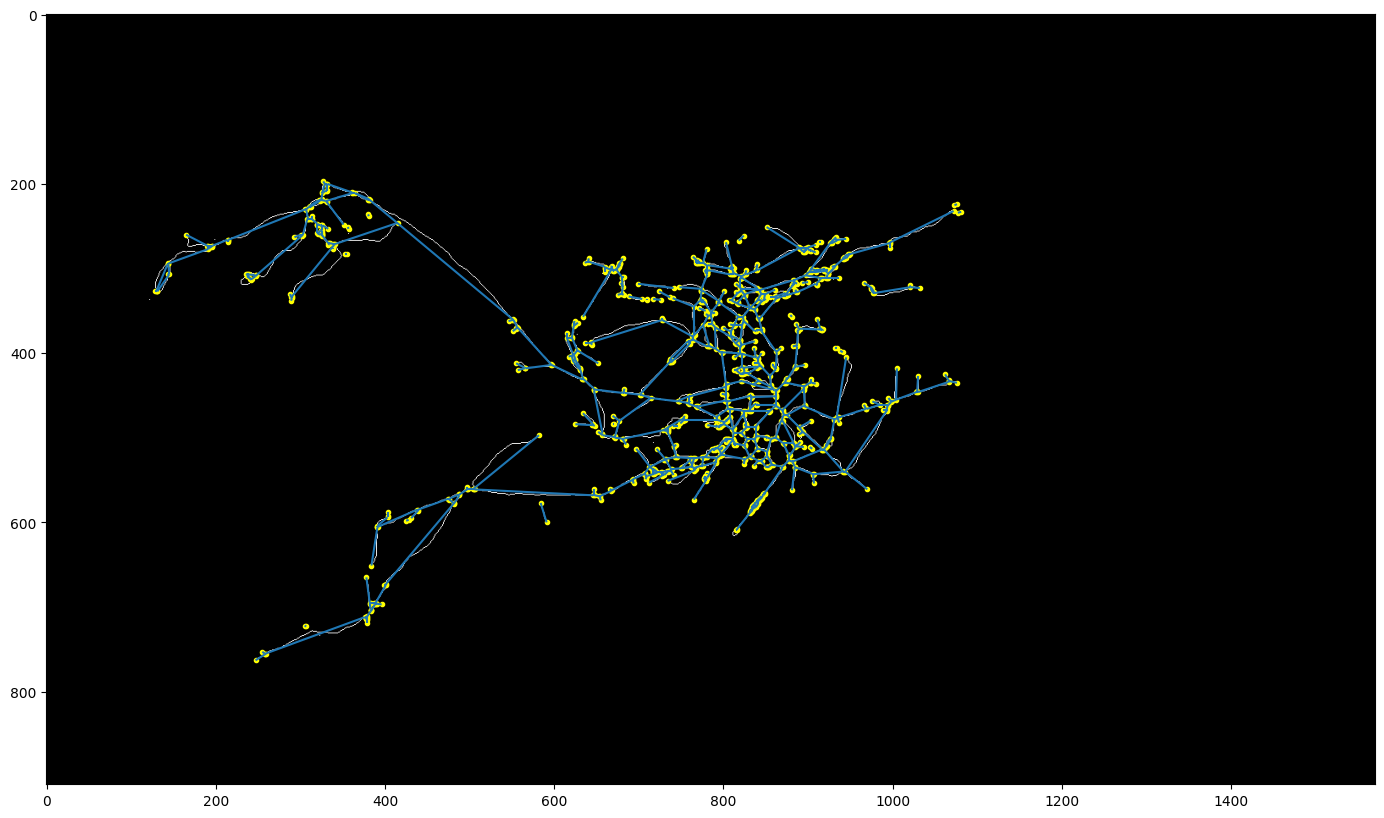

In [15]:
net.plot()

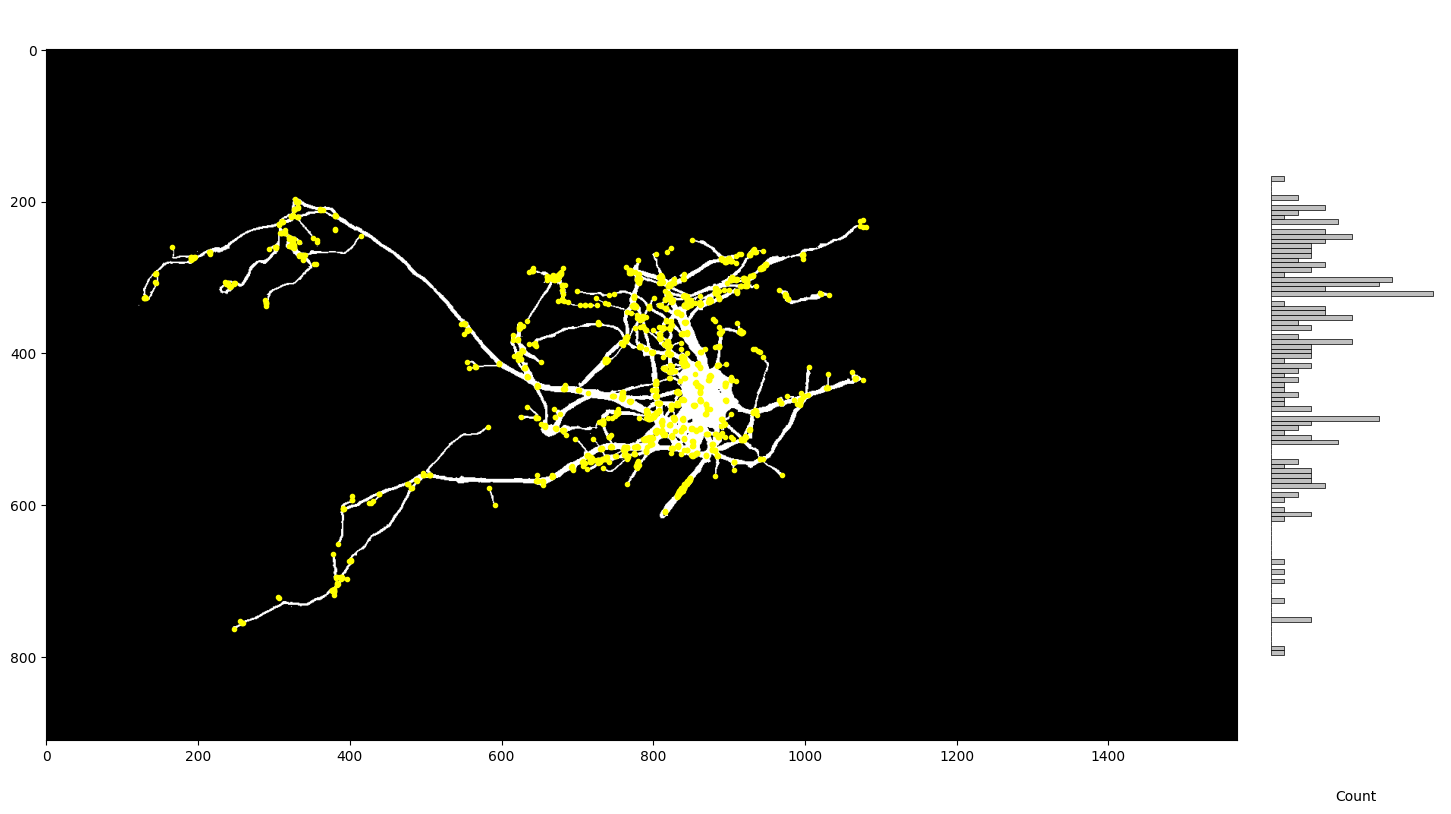

In [10]:
net.plot_with_nodedensity()

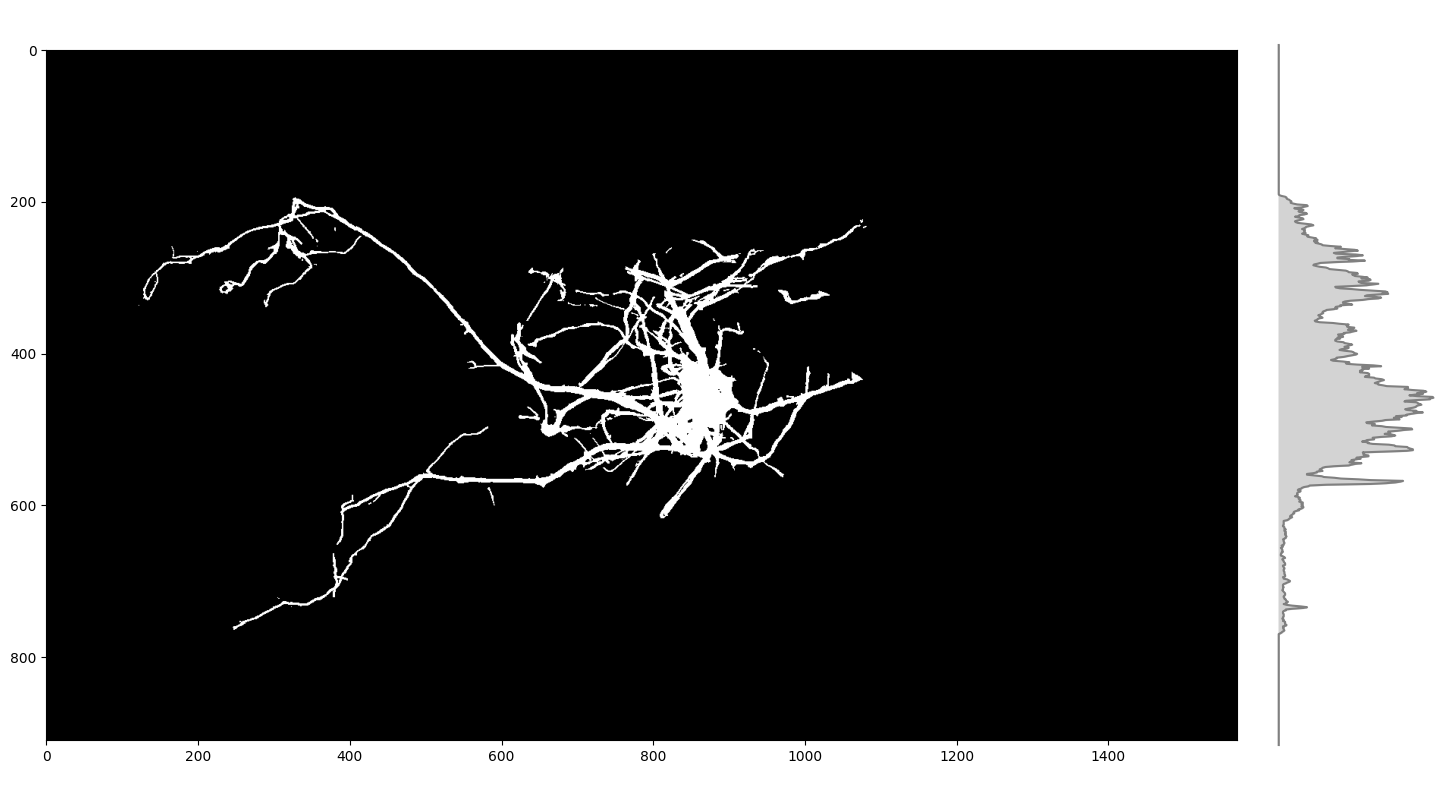

In [11]:
net.plot_with_pixeldensity()

In [12]:
net = NJANet.fromimage("test/capturetop.png")

Cleaning Edgelist: 100%|███████████████████████████████████████████| 4676/4676 [00:00<00:00, 1176518.63it/s]


In [13]:
# from skimage.filters import gaussian
# smoothed = gaussian(net.image, sigma=30, preserve_range=True)

# fig, ax = plt.subplots()
# ax.imshow(smoothed, cmap=plt.cm.gray)
# plt.show()

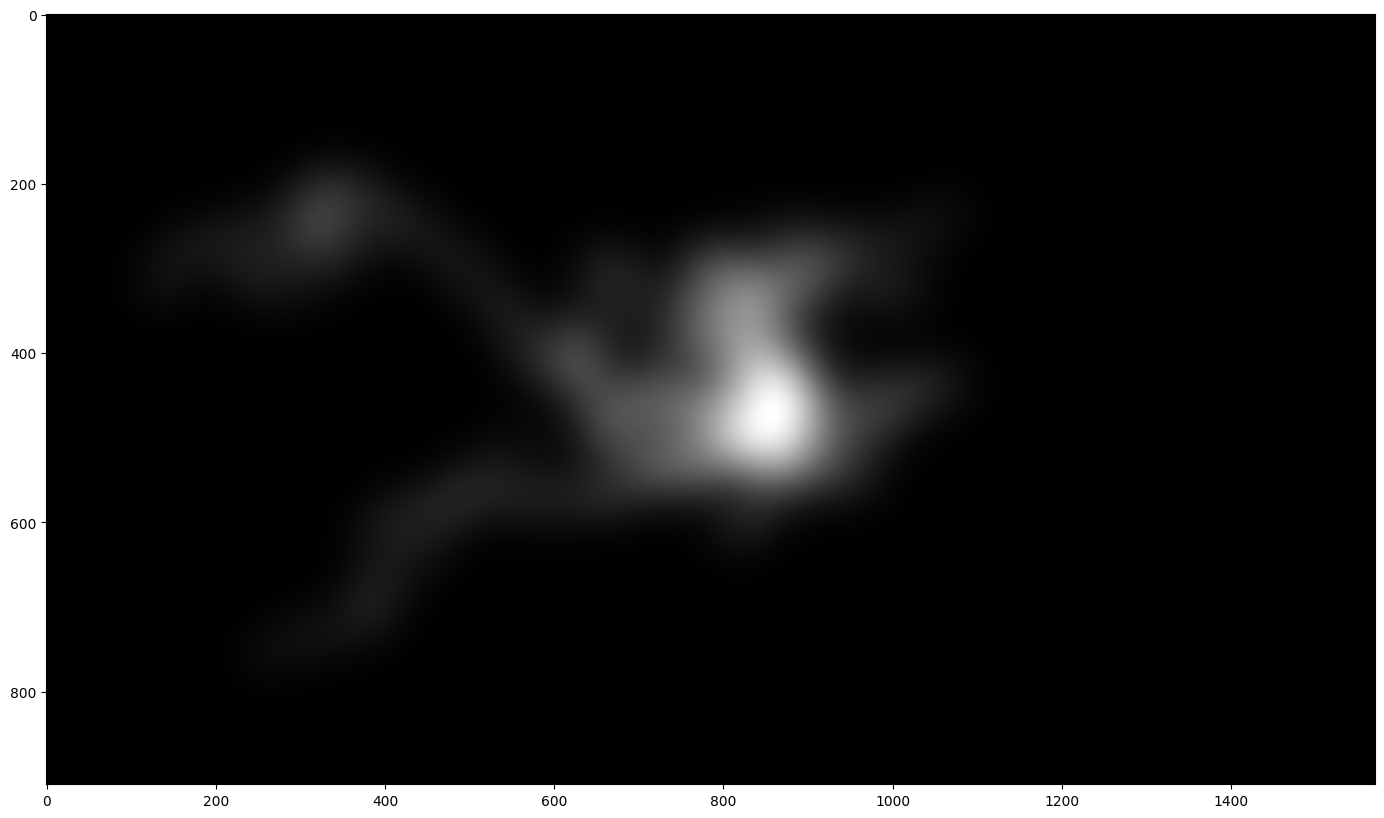

In [14]:
# IMPLEMENTED
net.generate_blurred()
# COMPAT
smoothed = net.blurred

fig, ax = plt.subplots()
ax.imshow(net.blurred, cmap=plt.cm.gray)
plt.show()

In [15]:
# from skimage.measure import regionprops
# import numpy as np
# region = regionprops(net.image.astype(np.uint8))[0]

In [16]:
# region.centroid

In [17]:
# IMPLEMENTED
net.find_centroid()
net.centroid

(430.2818783922722, 739.1935776964827)

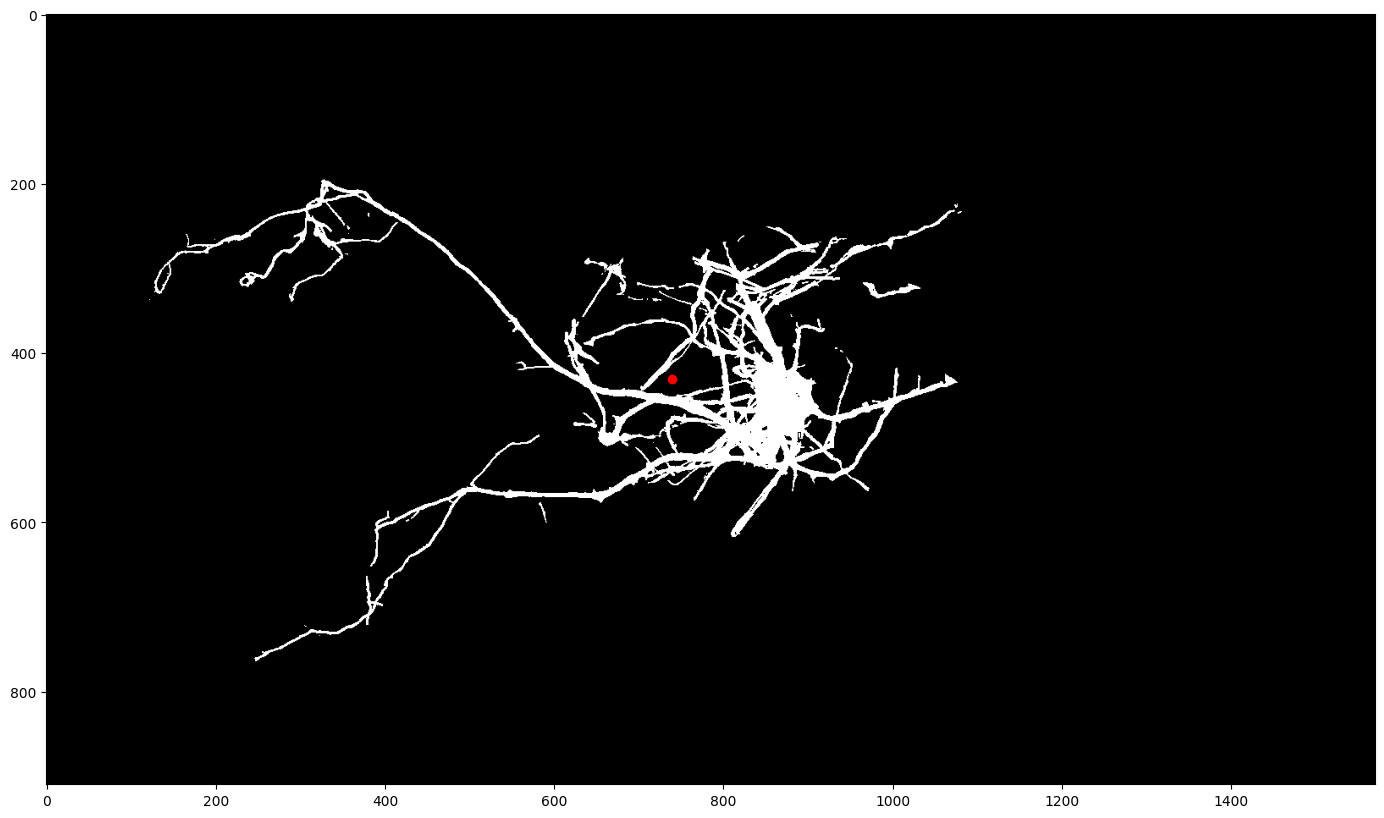

In [18]:
fig, ax = plt.subplots()
ax.imshow(net.image, cmap=plt.cm.gray)
ax.plot(net.centroid[1], net.centroid[0], color="r", marker="o")
plt.show()

In [19]:
# COMPAT
def find_region_asymmetry(blurred, centroid, threshold):
    thresholded = blurred > threshold
    region = regionprops(thresholded.astype(np.uint8))[0]
#     fig, ax = plt.subplots()
#     ax.imshow(thresholded, cmap=plt.cm.gray)
#     ax.plot(region.centroid[1], region.centroid[0], color="r", marker="o")
#     plt.show()
    return region.centroid

In [20]:
# find_region_asymmetry(smoothed, net.centroid, 0.8)

In [21]:
# threshes = np.linspace(0.0,np.amax(smoothed),129)[:-1]

In [22]:
# centroids = np.array([find_region_asymmetry(smoothed, net.centroid, x) for x in threshes])

In [23]:
# np.amax(smoothed)

In [24]:
# IMPLEMENTED
net.calculate_contour_centroids()
net.contour_centroids[0]

# COMPAT
centroids = net.contour_centroids

**Anything after this point has not yet been implemented into the package unless otherwise specified**

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


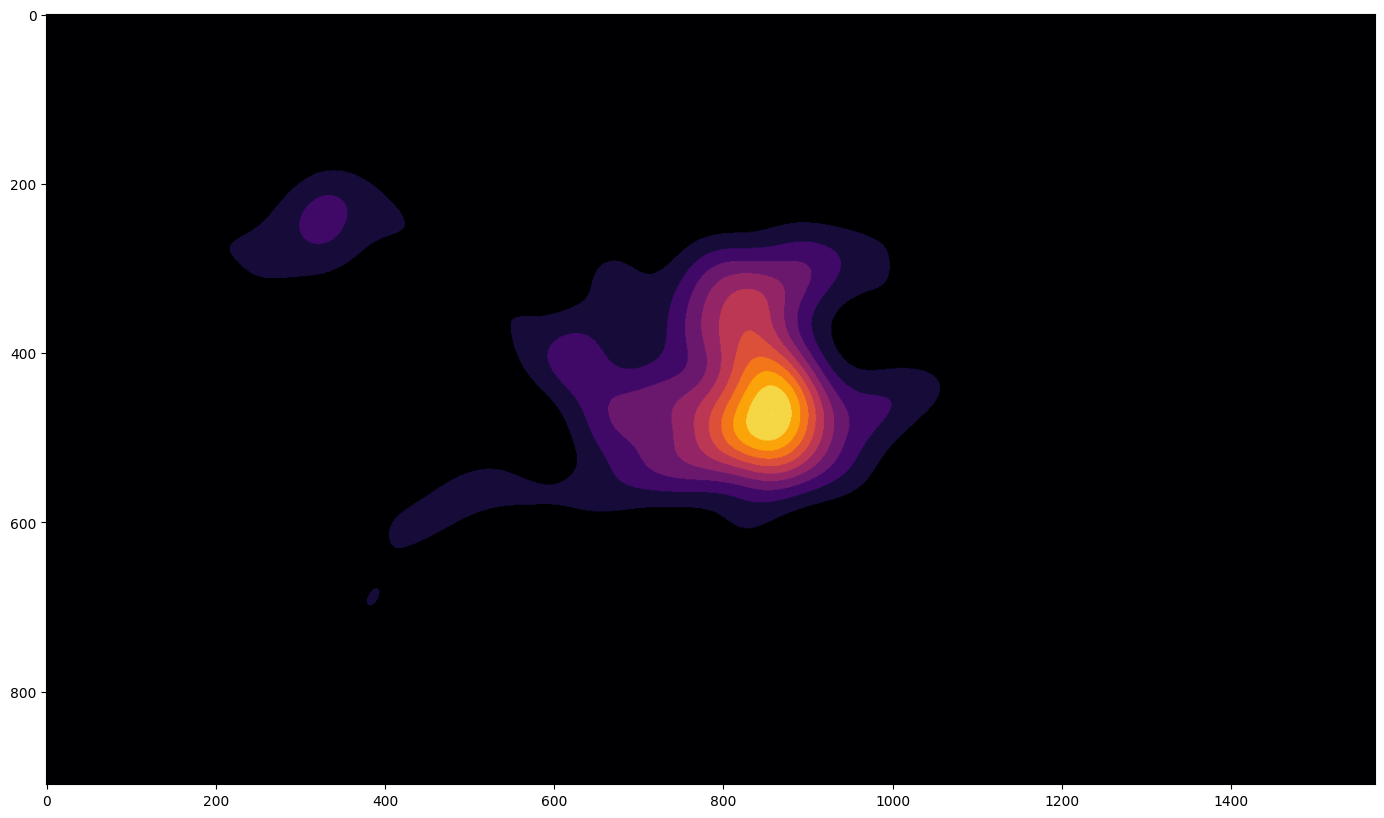

In [25]:
from copy import deepcopy
def create_contour_image(blurred, regions, return_labels = False):
    contoured = deepcopy(blurred)
    contoured /= np.amax(contoured) # Stretch histogram by normalising max to 1
    contoured *= regions # Normalise to number of regions
    contoured = contoured.astype(np.uint8) # fix to ints by casting side effect
    if not return_labels:
        contoured = contoured.astype(np.float64)
        contoured /= np.amax(contoured) # Scale between 0 and 1 ()
    return contoured
contour = create_contour_image(smoothed, 10, False)
print(np.unique(contour))
fig, ax = plt.subplots()
ax.imshow(contour, cmap=plt.cm.inferno)
plt.show()

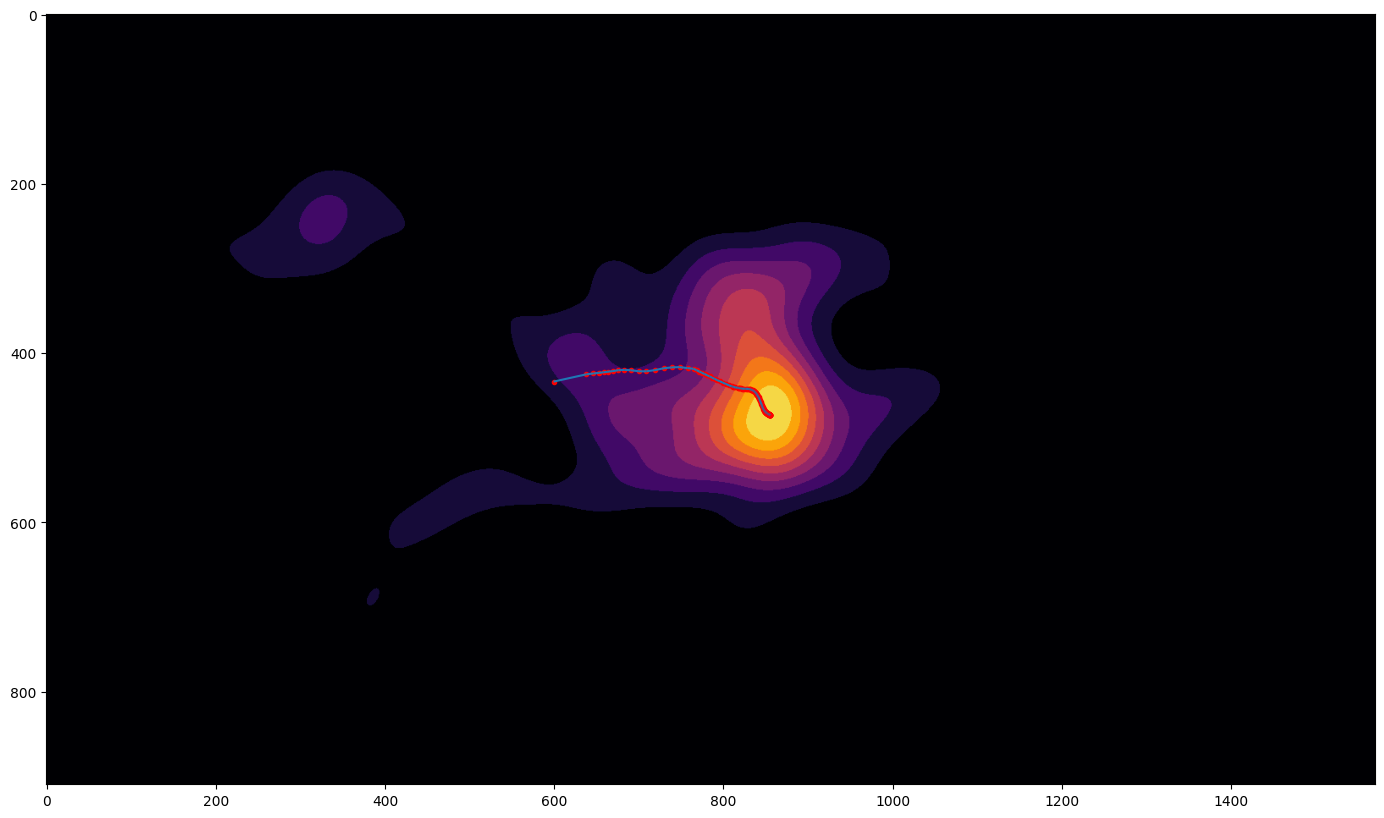

In [26]:
from matplotlib.collections import LineCollection
fig, ax = plt.subplots()
ax.imshow(contour, cmap=plt.cm.inferno)

ax.plot(centroids[:, 1], centroids[:, 0], color='red', marker='o',
                    linestyle='None', markersize=3)

trace = []
for i in range(len(centroids)-1):
    trace.append([centroids[i][::-1], centroids[i+1][::-1]])
ax.add_collection(LineCollection(trace))
plt.show()


In [27]:
net.centroid[1], 0

(739.1935776964827, 0)

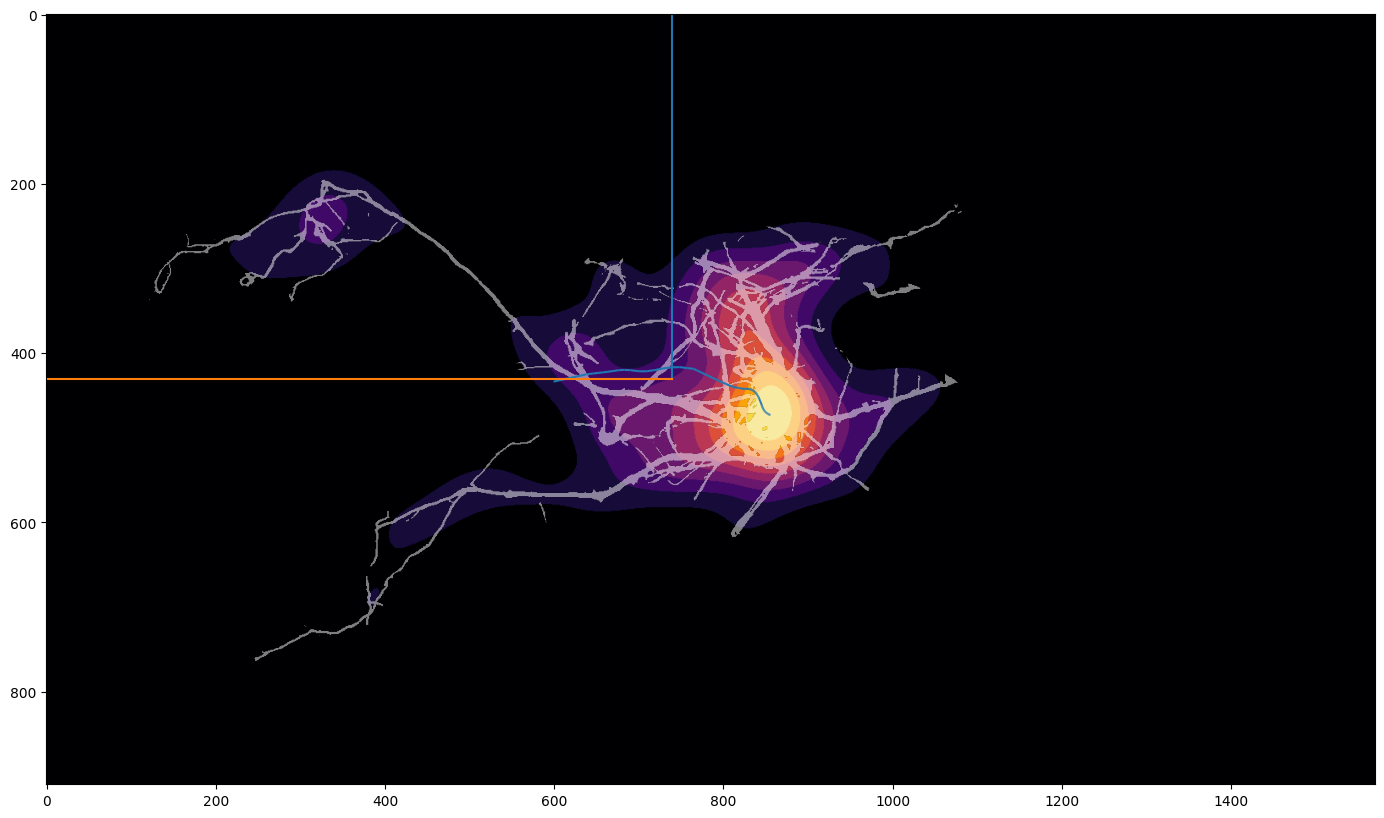

In [28]:
onlywhite = deepcopy(net.image)
cm = plt.get_cmap("gray")
onlywhite = cm(onlywhite.astype(np.float64))
alpha = net.image != 0 
onlywhite[:,:,3] = (alpha.astype(np.float64))/2
fig, ax = plt.subplots()

ax.imshow(contour, cmap=plt.cm.inferno)
ax.imshow(onlywhite)
ax.add_collection(LineCollection(trace))
# ax.add_collection(LineCollection([net.centroid[1], , [net.centroid[0], 0]]))
ax.plot([net.centroid[1], net.centroid[1]], [net.centroid[0], 0])
ax.plot([net.centroid[1], 0], [net.centroid[0], net.centroid[0]])
plt.show()

In [29]:
centroidpairs = np.array(trace)
np.sum(np.linalg.norm(centroidpairs[:,0] - centroidpairs[:,1], ord=2, axis=1))

279.74185563285886

In [30]:
trace[-1]

[array([855.44197531, 473.07160494]), array([855.49 , 473.175])]

In [31]:
np.linalg.norm(centroids - net.centroid, ord=2, axis=1)

array([140.02019989, 101.27399271,  93.16944028,  86.66880097,
        80.97523861,  76.19340379,  70.47851152,  64.06704135,
        57.2879271 ,  49.87937808,  40.12627884,  31.52918182,
        22.70417726,  15.65484595,  13.48893776,  16.53213188,
        22.30437159,  28.06826719,  30.81401722,  33.41279999,
        36.11755876,  38.8564387 ,  41.6612351 ,  44.49382855,
        47.36718621,  50.35557811,  53.47150364,  56.72467764,
        60.18519162,  63.88747116,  67.85374858,  71.06278505,
        72.22146685,  73.60449468,  75.44314798,  78.36481615,
        79.45234008,  80.30727267,  81.24934585,  82.26983917,
        83.43566873,  84.72606763,  86.18803692,  87.83924929,
        89.37423888,  90.66196893,  91.68193997,  92.65461993,
        93.49828316,  94.32978212,  95.04913534,  95.74858038,
        96.41309031,  97.0728952 ,  97.66386197,  98.29060891,
        98.87263042,  99.48743583, 100.03866244, 100.62472359,
       101.21214385, 101.7823714 , 102.30670163, 102.87

In [32]:
from skimage.measure import profile_line

In [33]:
net.centroid

(430.2818783922722, 739.1935776964827)

In [34]:
along_line = profile_line(smoothed, net.centroid, (0, net.centroid[1]))

In [35]:
np.linalg.norm(np.asarray([smoothed.shape[0], net.centroid[1]]) - np.asarray(net.centroid), ord=2, axis=0)

479.7181216077278

In [36]:
stacked = np.stack([along_line, np.linspace(0,np.linalg.norm(np.asarray([0, net.centroid[1]]) - np.asarray(net.centroid), ord=2, axis=0), len(along_line))]).T

In [37]:
stacked[:,1]

array([  0.        ,   0.99833382,   1.99666765,   2.99500147,
         3.9933353 ,   4.99166912,   5.99000295,   6.98833677,
         7.9866706 ,   8.98500442,   9.98333825,  10.98167207,
        11.98000589,  12.97833972,  13.97667354,  14.97500737,
        15.97334119,  16.97167502,  17.97000884,  18.96834267,
        19.96667649,  20.96501032,  21.96334414,  22.96167797,
        23.96001179,  24.95834561,  25.95667944,  26.95501326,
        27.95334709,  28.95168091,  29.95001474,  30.94834856,
        31.94668239,  32.94501621,  33.94335004,  34.94168386,
        35.94001768,  36.93835151,  37.93668533,  38.93501916,
        39.93335298,  40.93168681,  41.93002063,  42.92835446,
        43.92668828,  44.92502211,  45.92335593,  46.92168976,
        47.92002358,  48.9183574 ,  49.91669123,  50.91502505,
        51.91335888,  52.9116927 ,  53.91002653,  54.90836035,
        55.90669418,  56.905028  ,  57.90336183,  58.90169565,
        59.90002947,  60.8983633 ,  61.89669712,  62.89

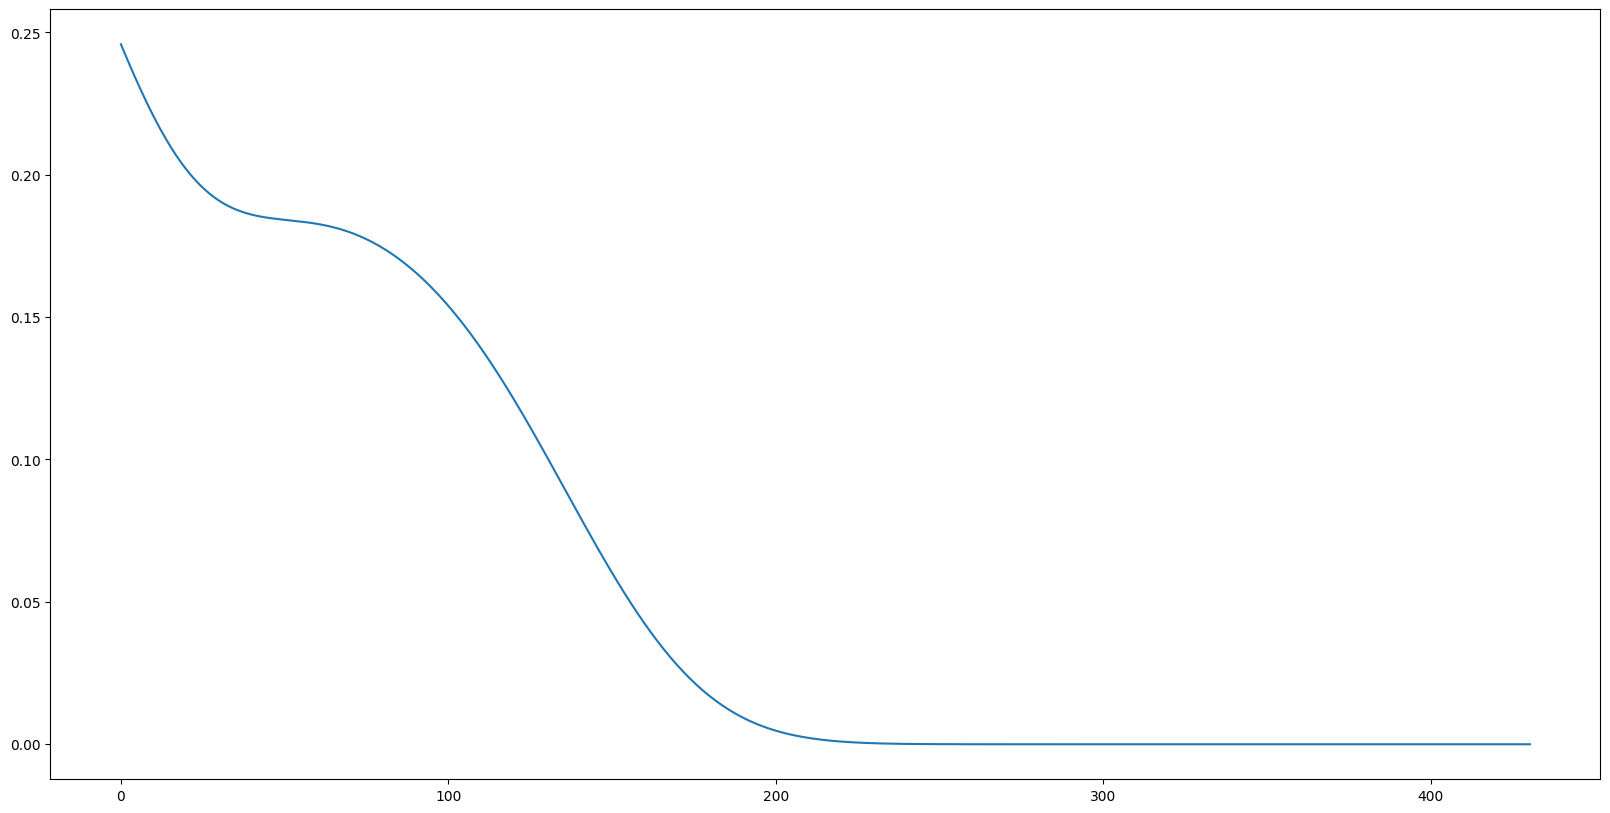

In [38]:
fig, ax = plt.subplots()

ax.plot(stacked[:,1], stacked[:,0])
plt.show()

In [39]:
along_line_2 = profile_line(smoothed, net.centroid, (smoothed.shape[0], net.centroid[1]))

In [40]:
stacked_2 = np.stack([along_line_2, np.linspace(0,np.linalg.norm(
    np.asarray([smoothed.shape[0], net.centroid[1]]) - np.asarray(net.centroid),
    ord=2, axis=0), len(along_line_2))]).T

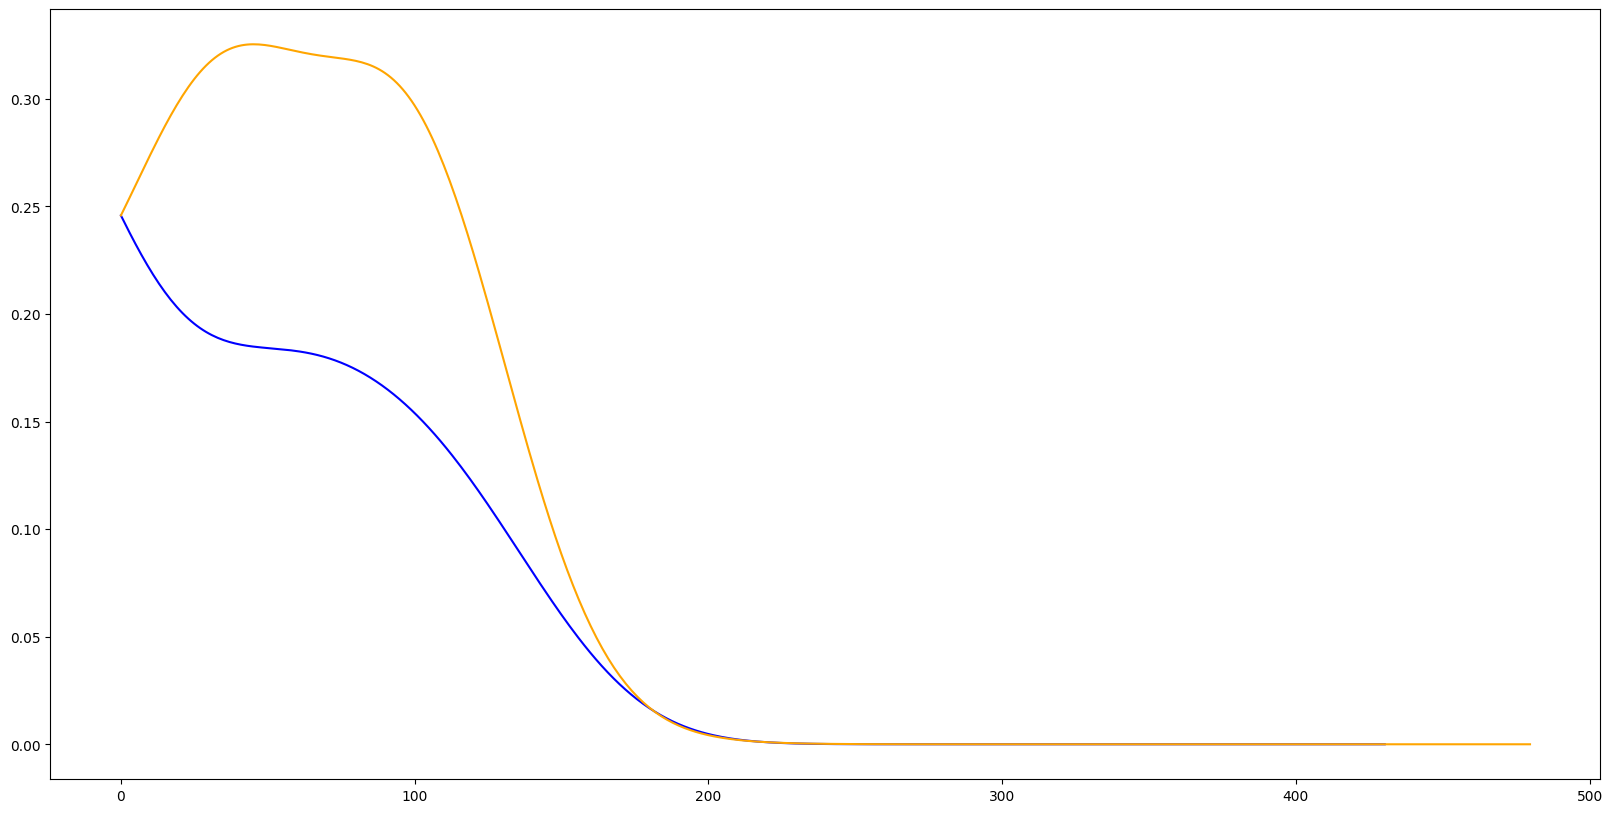

In [41]:
fig, ax = plt.subplots()

ax.plot(stacked[:,1], stacked[:,0], color = "b")
ax.plot(stacked_2[:,1], stacked_2[:,0], color = "orange")
plt.show()

In [42]:
along_line_3 = profile_line(smoothed, net.centroid, (net.centroid[0], 0))
stacked_3 = np.stack([along_line_3, np.linspace(0,np.linalg.norm(
    np.asarray([net.centroid[0], 0]) - np.asarray(net.centroid),
    ord=2, axis=0), len(along_line_3))]).T

In [43]:
along_line_4 = profile_line(smoothed, net.centroid, (net.centroid[0], smoothed.shape[1]))
stacked_4 = np.stack([along_line_4, np.linspace(0,np.linalg.norm(
    np.asarray([net.centroid[0], smoothed.shape[1]]) - np.asarray(net.centroid),
    ord=2, axis=0), len(along_line_4))]).T

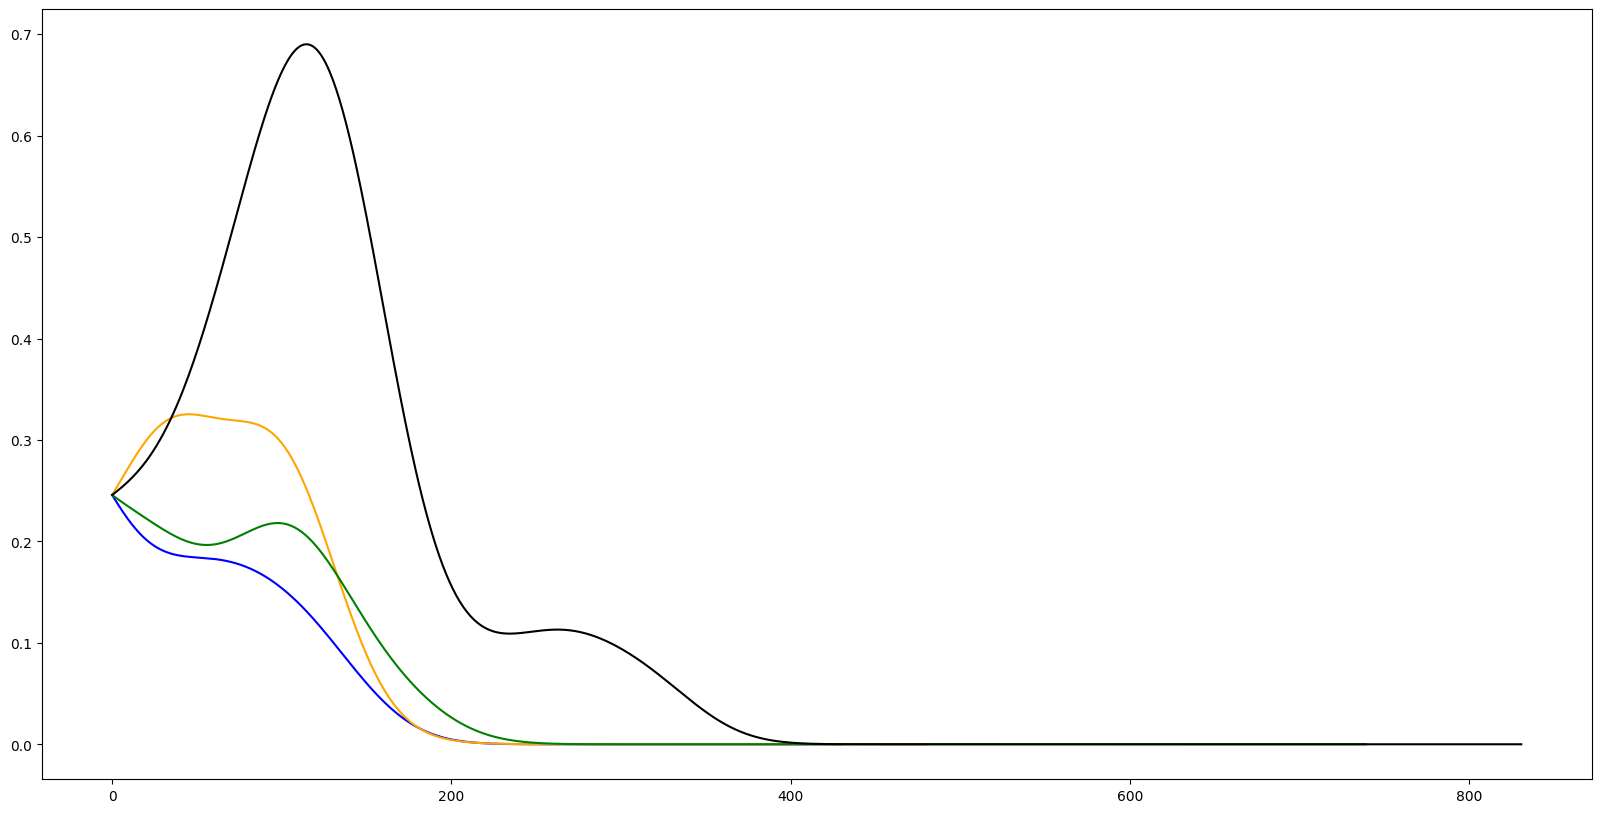

In [44]:
fig, ax = plt.subplots()

ax.plot(stacked[:,1], stacked[:,0], color = "b")
ax.plot(stacked_2[:,1], stacked_2[:,0], color = "orange")
ax.plot(stacked_3[:,1], stacked_3[:,0], color = "green")
ax.plot(stacked_4[:,1], stacked_4[:,0], color = "black")
plt.show()

- Rays are a sample of density at a given radial distance from the centroid
- Make each ray the max distance between the centroid and the image boundary and set the oob interpolation method to be constant 0 - **Note that this can lead to accidentally decreasing the RSS value, we need to think about what this means**
- Weight these values by their distance from the centroid (pi*d) (actually do we need to do this?)
- Bin these slices into a set number of bins and calculate the mean of each bin
- Select random pixels from the image and subtract the mean of the bins, then square the result. This deviation goes into a pot, which then gets summed to give an *RSS* value!

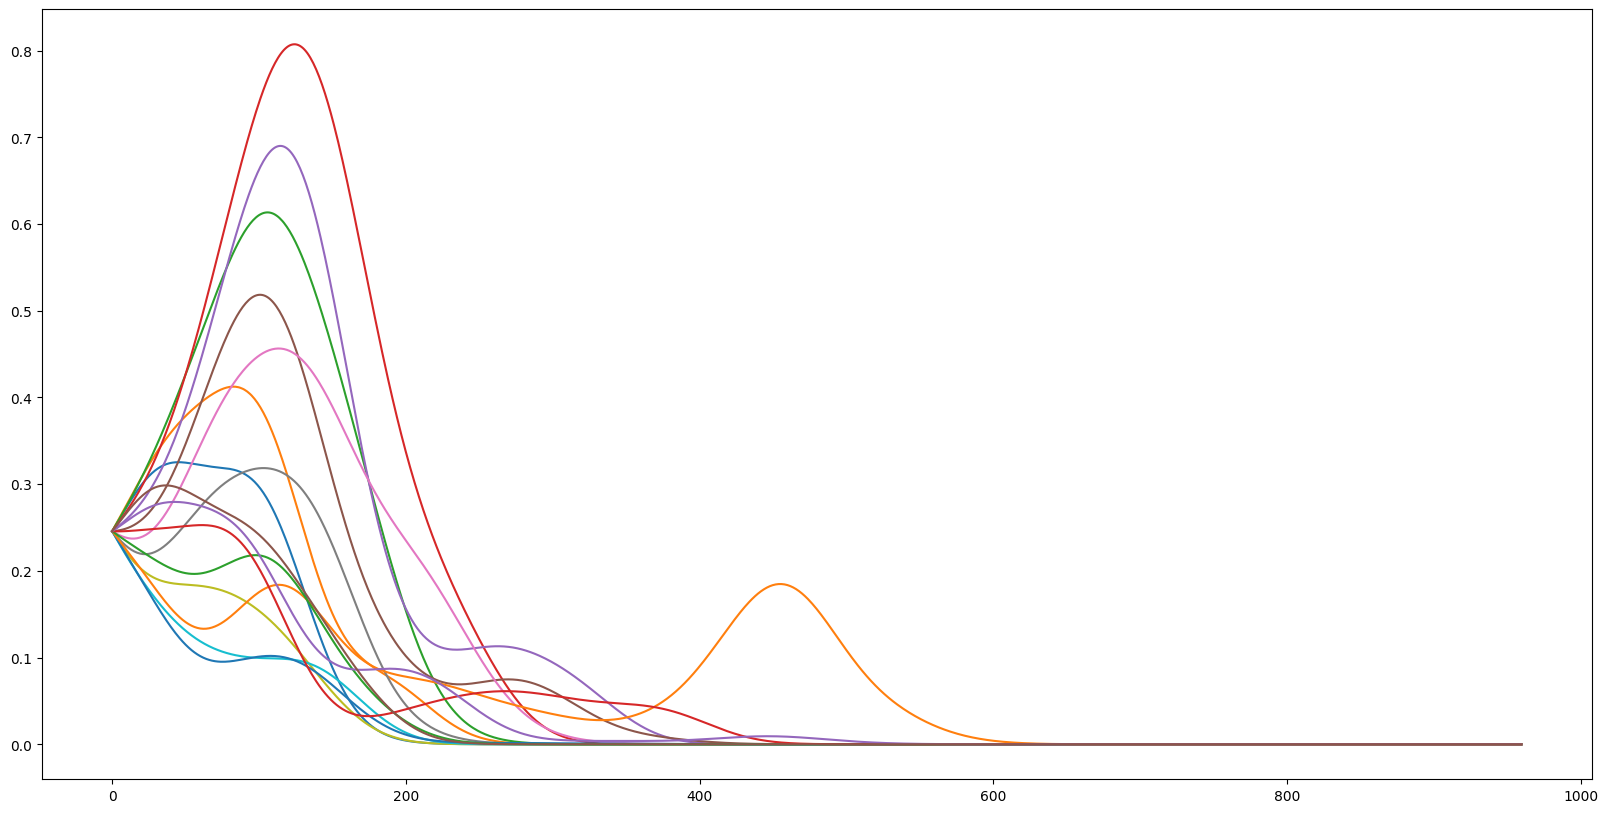

In [45]:
def calculate_mean_radial_density(image, centroid, rays=8, bins = 100, plotit = False):
    ### Returns array of cols: [inclusive bin upper bound, mean pixel value]
    
    centroid = np.array(centroid)
#     raydistance = np.linalg.norm(image.shape)
    tld = np.linalg.norm(centroid, ord=2)
    trd = np.linalg.norm(centroid - np.asarray([0, image.shape[1]]), ord=2)
    bld = np.linalg.norm(centroid - np.asarray([image.shape[0], 0]), ord=2)
    brd = np.linalg.norm(centroid - np.asarray([image.shape]), ord=2)
    raydistance = max([tld, trd, bld, brd])
    if bins > raydistance:
#         raise ValueError(f"Cannot use more bins ({bins}) than the ray distance ({raydistance})")
        bins = int(np.floor(raydistance))
        print(bins)
    
    if plotit:
        fig, ax = plt.subplots()
    
#     raycoords = []
    samples = np.array([], dtype=np.float64).reshape(0,2)
    # calc coordinates of a ray
    for i in range(rays):
        radangle = (i * np.pi / (rays / 2))
#         print(radangle)
        dx = np.sin(radangle) * raydistance
        dy = np.cos(radangle) * raydistance
        deltas = np.array([dy, dx])
        raycoords = np.array(centroid + deltas)
        along_line = profile_line(smoothed, centroid, raycoords, mode="constant", cval=0.0)
        stacked = np.stack([along_line, np.linspace(0, raydistance, len(along_line))]).T
        samples = np.vstack([samples, stacked])
        if plotit:
            ax.plot(stacked[:,1], stacked[:,0])
    
    binarray = np.linspace(0, raydistance, bins)

    samplebins = np.digitize(samples[:,1], binarray, right=True)
    
    # Look up locations of each bin, then get values in col [0] at those row indices
    # Get the mean of those columns
    binmeans = np.zeros((bins, 2))
    binmeans[:,0] = binarray
#     binmeans = []
    for i in range(bins):
        binmeans[i, 1] = np.mean(samples[np.where(samplebins==i)[0], 0][0])
#     print(binmeans)
    
#     samples = np.append(samples, samplebins[:, None], axis=1)
    # Numpy.digitize will be useful for looking up bins
    
    if plotit:
        plt.show()
    return binmeans
#     raycoords = np.asarray(raycoords)
    
    
    
radialmeans = calculate_mean_radial_density(smoothed, net.centroid, rays=16, bins=100, plotit=True)
# radialmeans = calculate_mean_radial_density(smoothed, np.array([855.49 , 473.175]), rays=16, bins=100, plotit=True)


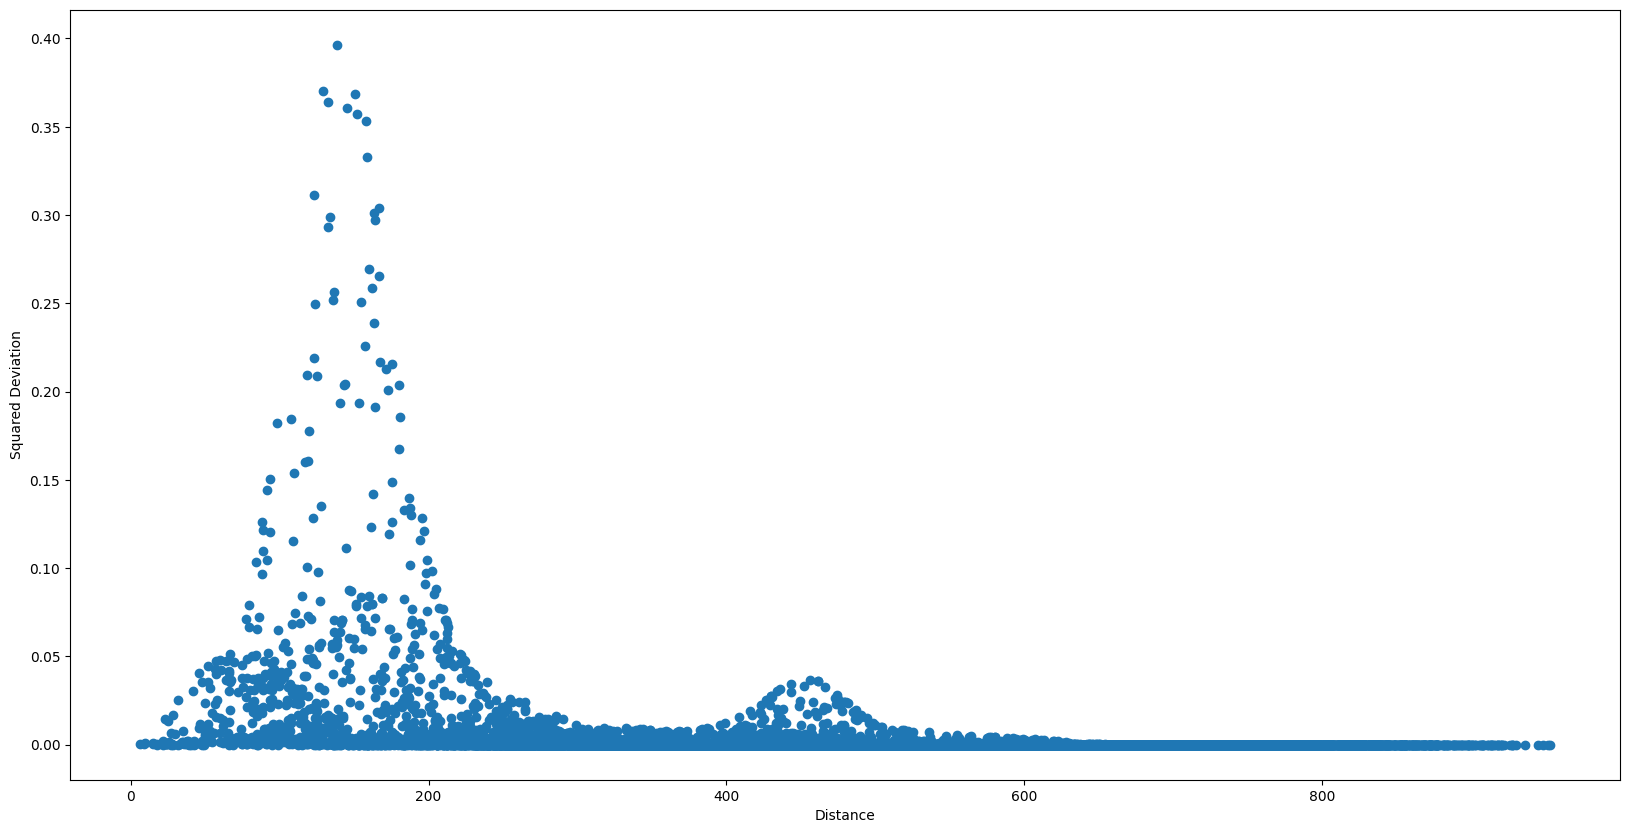

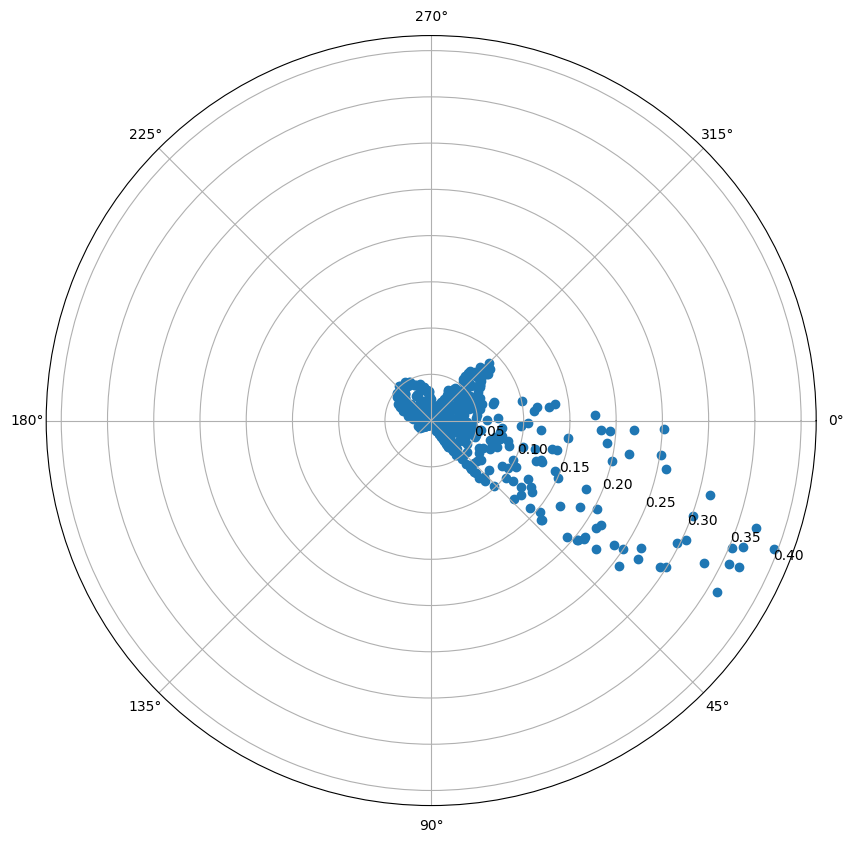

In [46]:
def assess_asymmetry(image, centroid, binmeans, samples=None):
    if samples is None:
        samples = int((image.shape[0] * image.shape[1]) / 10)
    
    binarray = binmeans[:,0]
    binmeans = binmeans[:,1]
    
    rng = np.random.default_rng()
    
    xs = rng.integers(0,image.shape[1], size=samples)
    ys = rng.integers(0,image.shape[0], size=samples)
    
    # At this point we could possibly look to try and detect the centroid and reroll it if we were worried
    
    vals = image[ys, xs]
    
    normed_coords = np.array([ys, xs]).T - centroid
    
    distances = np.linalg.norm(normed_coords, ord=2, axis=1)
    angles = np.arctan2(normed_coords[:,0], normed_coords[:,1])
    
    # Bin samples by predefined bins
    samplebins = np.digitize(distances, binarray, right=True)
    # Fix cases where distance is at or longer than the max distance for some reason
    samplebins[np.where(samplebins >= len(binmeans))] = len(binmeans)-1
    deviations = vals - binmeans[samplebins]
    squareddeviations = deviations ** 2
    
    fig, ax = plt.subplots()
#     fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
    ax.set_xlabel("Distance")
    ax.set_ylabel("Squared Deviation")
    ax.scatter(distances, squareddeviations)
    plt.show()
    
#     fig, ax = plt.subplots()
    fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
    ax.set_theta_direction("clockwise")
    ax.scatter(angles, squareddeviations)
    plt.show()
    
    return squareddeviations
    

devs = assess_asymmetry(smoothed, net.centroid, radialmeans, 10000)
# devs = assess_asymmetry(smoothed, np.array([855.49 , 473.175]), radialmeans, 10000)
# array([855.49 , 473.175])

Here we can see (now that I've actually aligned the plot appropriately) that the major asymmetry seems to be from the bottom right (theta == 23deg).

Still need to work out precisely how best to understand this as we have a major zero inflation thing going on, but hey.

In [47]:
tst = np.array([0,0]) - net.centroid
print(f"[0,0] is {np.arctan2(tst[0], tst[1]) * (180/np.pi)} from {net.centroid}")
tst = np.array([smoothed.shape[0], 0]) - net.centroid
print(f"[{smoothed.shape[0]}, 0] is {np.arctan2(tst[0], tst[1]) * (180/np.pi)} from {net.centroid}")
tst = np.array([0, net.centroid[1]]) - net.centroid
print(f"[0, {net.centroid[1]}] is {np.arctan2(tst[0], tst[1]) * (180/np.pi)} from {net.centroid}")
tst = np.array([net.centroid[0], 0]) - net.centroid
print(f"[{net.centroid[0]}, 0] is {np.arctan2(tst[0], tst[1]) * (180/np.pi)} from {net.centroid}")

# 0 is facing EAST

[0,0] is -149.79647162945474 from (430.2818783922722, 739.1935776964827)
[910, 0] is 147.0174386287749 from (430.2818783922722, 739.1935776964827)
[0, 739.1935776964827] is -90.0 from (430.2818783922722, 739.1935776964827)
[430.2818783922722, 0] is 180.0 from (430.2818783922722, 739.1935776964827)


In [48]:
sum(devs)

35.38330243036146

<AxesSubplot: ylabel='Density'>

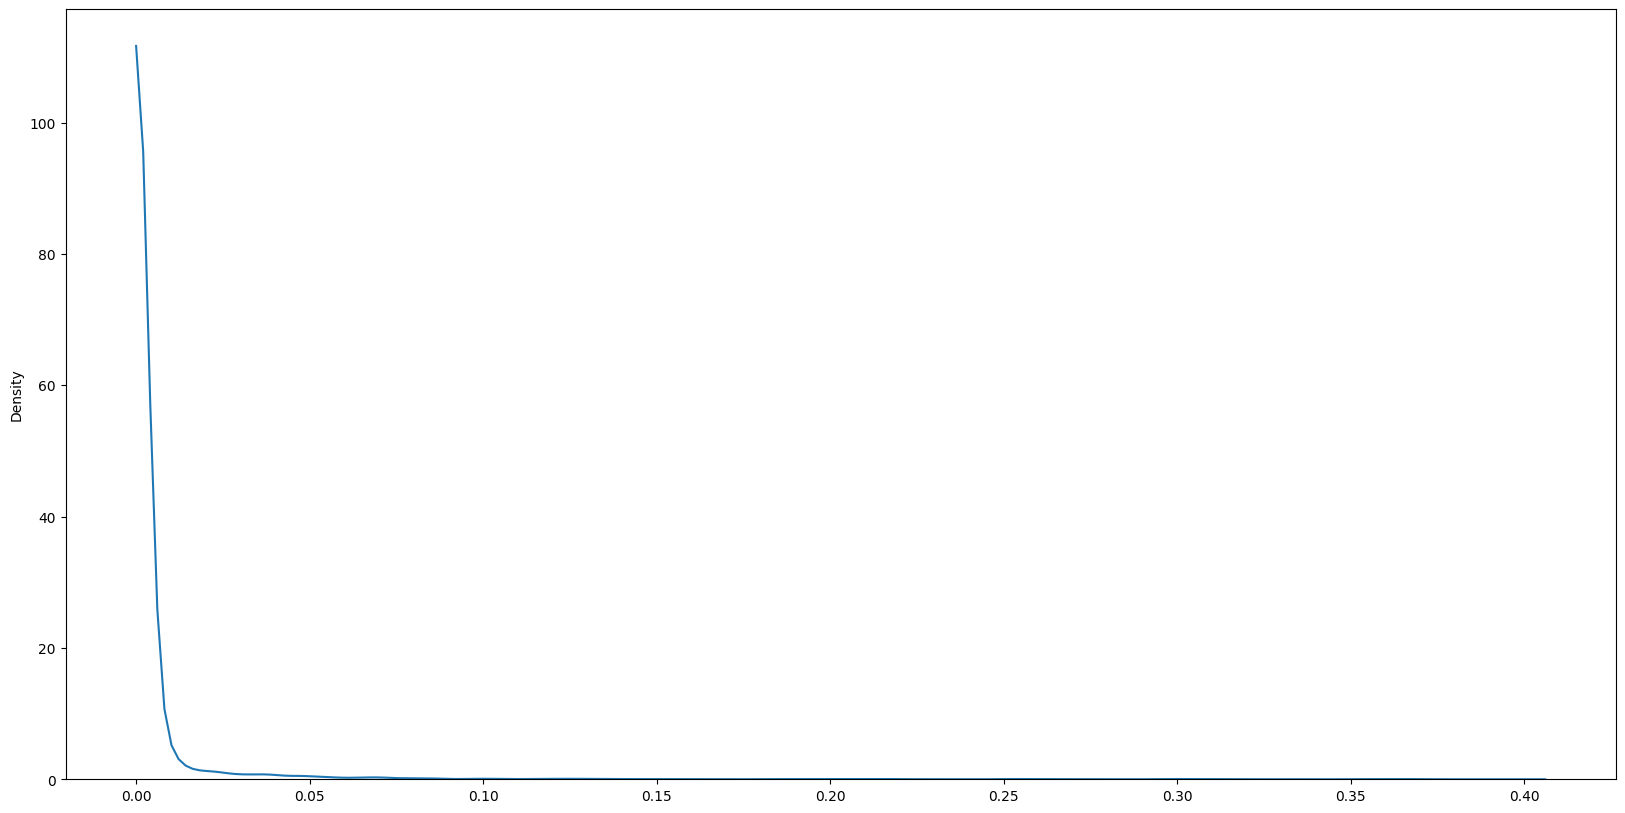

In [49]:
sns.kdeplot(devs, clip = [0,1])

## Remaining questions
- Does this make sense?
- Should I normalise the RSS by the sample size?
- There might be a sampling bias for the sampling as the centroid is not in the middle of the image.

- Idea of getting area:
    - Grow circle around each node on the original image until we are hitting black
    - This gives width at each node
    - Can use this to work out approximate area of an edge.
    - parallelogram?

## Traits
1. Length of primary roots
    - Length of the edges connected to the primary trunk node
    - We may have a problem doing this programatically. Will have to think about it with Holly
2. Redistribution of branch root density from surface to depth
    - Just root density distribution as outlined above
3. ~~Number of root tips~~
    - ~~Num 1-nodes~~
4. ~~Distance of root tips from centre~~
    - ~~1-node distribution?)~~
5. ~~Max depth/distance from central trunk node~~
    - ~~Find max euclidean distance of a tip from the centre~~

In [50]:
net = NJANet.fromimage("test/capturetop.png")
# net.cluster_close_nodes(10)

Cleaning Edgelist: 100%|███████████████████████████████████████████| 4676/4676 [00:00<00:00, 1152595.53it/s]


In [51]:
net.generate_blurred().find_centroid().calculate_contour_centroids()

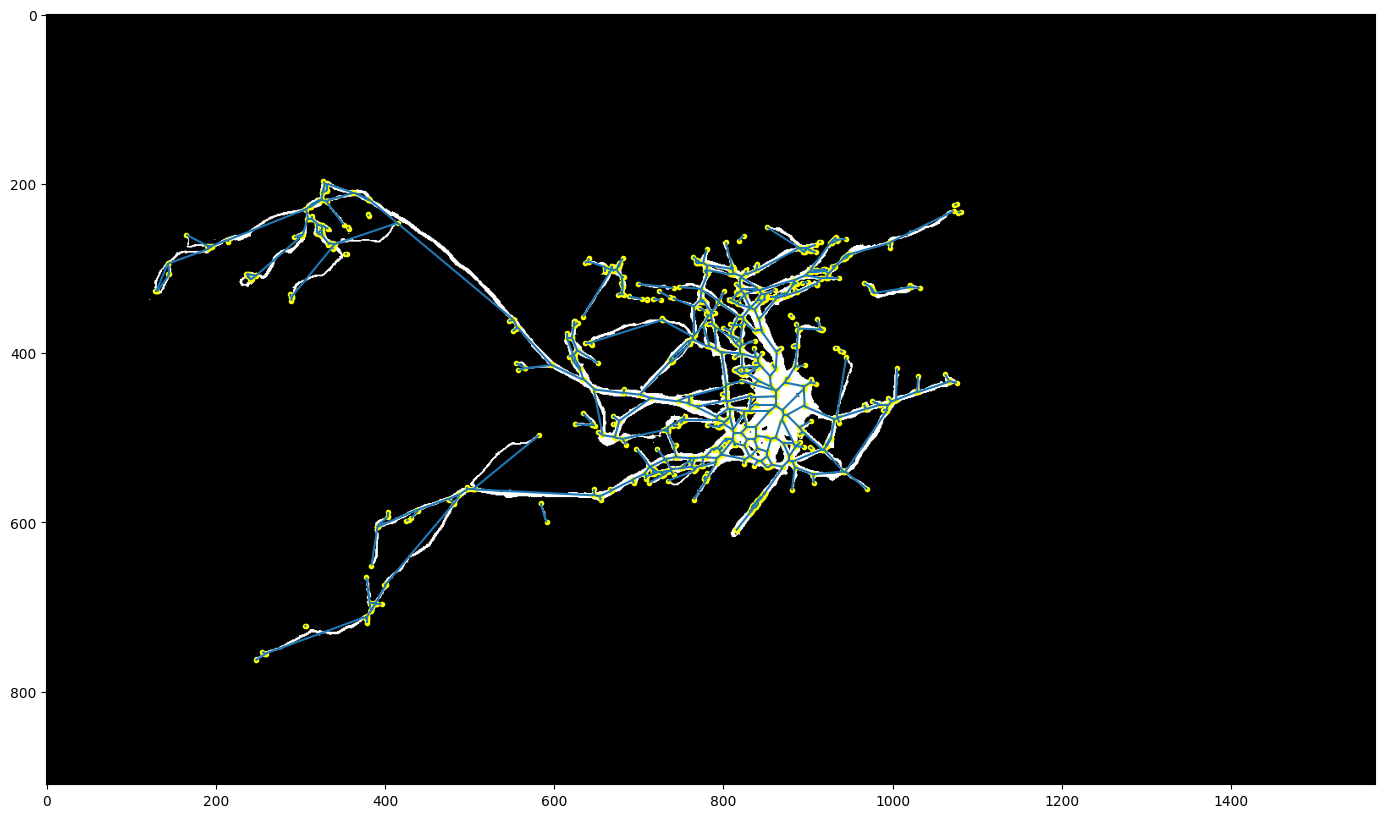

In [52]:
net.plot(True)

### Trait 1

In [53]:
# net.contour_centroids[-1]

In [54]:
# tnodes = np.array(list(net.nodes.keys()))
# print(len(tnodes))
# basenode = net.nodes[tuple(tnodes[np.argmin((np.linalg.norm(tnodes - net.contour_centroids[-1], ord=2, axis=1)))])]

In [55]:
# tuple(tnodes[np.argmin((np.linalg.norm(tnodes - net.contour_centroids[-1], ord=2, axis=1)))])

In [56]:
#IMPLEMENTED
net.find_basenode()

In [57]:
net.basenode

NJANode([469 854], (469, 854), [[ True  True  True]
 [False False False]
 [ True False False]], 4, ['NW', 'N', 'NE', 'SW'])

In [58]:
# basenode

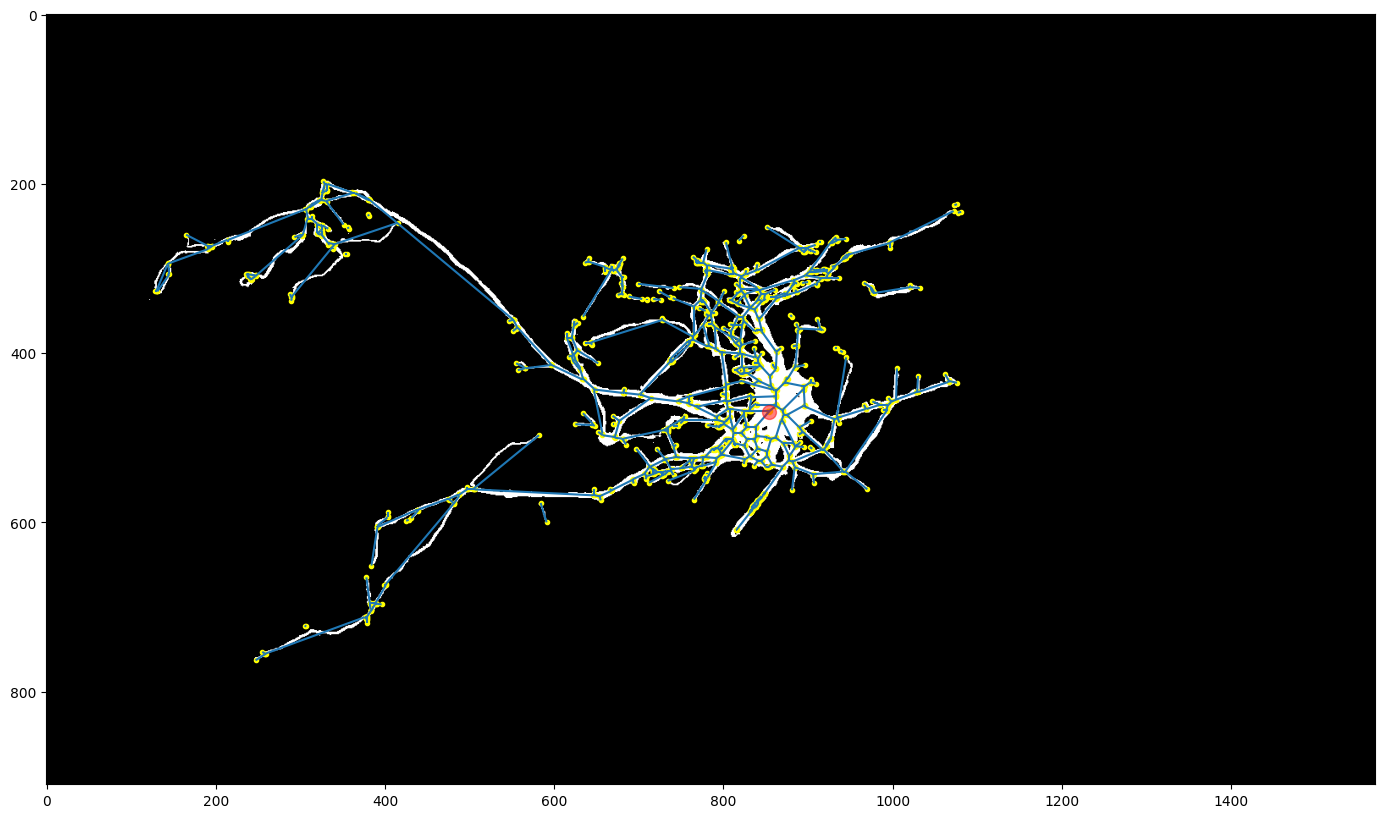

In [59]:
def plotit(network, plotoriginal=False):
        fig, ax = plt.subplots()
        if plotoriginal:
            ax.imshow(network.image, cmap=plt.cm.gray)
        else:
            ax.imshow(network.skel, cmap=plt.cm.gray)

        if network.nodes:
            nodes = np.asarray([x.position for x in network.nodes.values()])
            ax.plot(nodes[:, 1], nodes[:, 0], color='yellow', marker='o',
                    linestyle='None', markersize=3)
        if network.edges:
            edges = [x.plotting_repr for x in network.edges.values()]
            line_segments = LineCollection(edges)
            ax.add_collection(line_segments)
        
        ax.plot(*network.basenode.flipped_position, color='red', marker='o', alpha=0.5,
                    linestyle='None', markersize=10)
        plt.show()
plotit(net, True)

### Trait 3 - 1nodes

In [60]:
# 36 µs ± 230 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
len({x for x in net.nodes.values() if x.juncs==1})

191

In [61]:
# 55.1 µs ± 109 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
sum(x.juncs==1 for x in net.nodes.values())

191

In [62]:
# IMPLEMENTED
net.onenodes

191

### Trait 4

In [63]:
# np.linalg.norm(np.array([x.position for x in net.nodes.values() if x.juncs==1]) - net.basenode.position, ord=2, axis=1)

In [64]:
# IMPLEMENTED
net.basenode_to_roottip_distances()

array([593.05396045, 330.6191162 , 327.86735123, 322.01397485,
       327.4522866 , 323.9660476 , 528.1713737 , 587.33380628,
       526.39338902, 492.39212016, 549.40877314, 543.62487066,
       218.02064122, 564.00088652, 541.90866389, 720.00138889,
       210.15232571, 597.62613731, 220.62864728, 223.37636401,
       205.18284529, 669.56777103, 206.4000969 , 208.52098216,
       209.09567188, 557.00089767, 204.53361582, 550.91287877,
       240.2040799 , 550.56334785, 205.76685836, 195.88006535,
       534.41276182, 532.53826154, 203.93381279, 279.51744132,
       250.37971164, 280.17851452, 174.56230979, 186.32498491,
       175.11139312, 169.168555  , 181.07733155, 254.67822836,
       729.4449945 , 639.13457112, 233.49946467, 178.0112356 ,
       159.76545309, 231.7951682 , 156.92354826, 188.80677954,
       216.39316071, 155.95512175, 154.56390264, 159.53056134,
       223.06277143, 181.23189565, 184.62123388, 230.21728866,
       144.1700385 , 147.29901561, 739.75671677, 192.52

## Trait 5 - Max distance of root tip from trunk

In [65]:
# IMPLEMENTED
net.basenode_to_roottip_distances().max()

739.7567167657215

In [66]:
onenodes = np.array([x.position for x in net.nodes.values() if x.juncs==1])
furthest_onenode = net.nodes[tuple(onenodes[np.argmax(np.linalg.norm(onenodes - net.basenode.position, ord=2, axis=1))])]

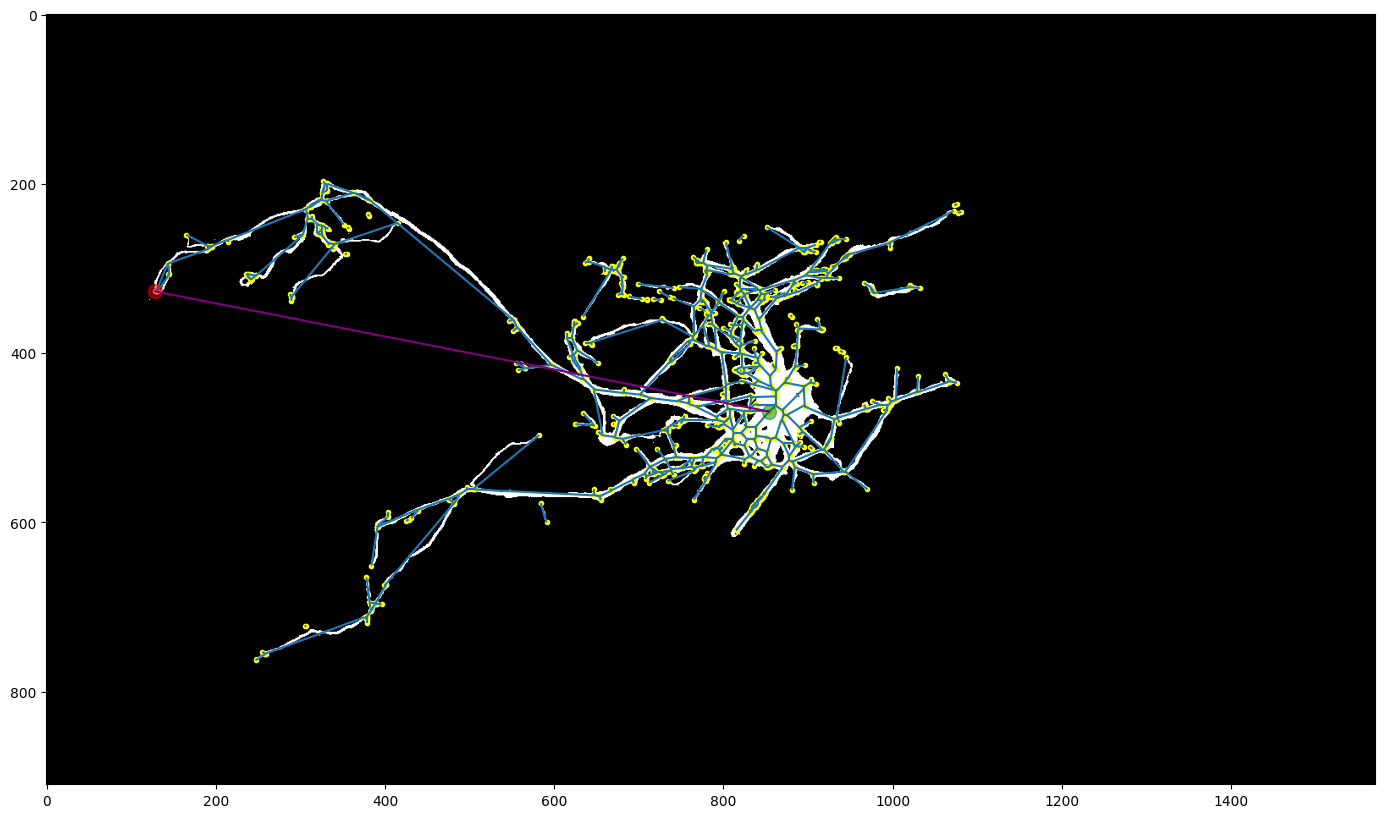

In [67]:
def plotit(network, plotoriginal=False):
        fig, ax = plt.subplots()
        if plotoriginal:
            ax.imshow(network.image, cmap=plt.cm.gray)
        else:
            ax.imshow(network.skel, cmap=plt.cm.gray)

        if network.nodes:
            nodes = np.asarray([x.position for x in network.nodes.values()])
            ax.plot(nodes[:, 1], nodes[:, 0], color='yellow', marker='o',
                    linestyle='None', markersize=3)
        if network.edges:
            edges = [x.plotting_repr for x in network.edges.values()]
            line_segments = LineCollection(edges)
            ax.add_collection(line_segments)
        
        ax.plot(*network.basenode.flipped_position, color='green', marker='o', alpha=0.5,
                    linestyle='None', markersize=10)
        ax.plot(*furthest_onenode.flipped_position, color='red', marker='o', alpha=0.5,
                    linestyle='None', markersize=10)
        
        ax.plot([furthest_onenode.position[1], network.basenode.position[1]], [furthest_onenode.position[0], network.basenode.position[0]], color='purple', alpha=1, linestyle='-')
        
        plt.show()
plotit(net, True)

In [69]:
print(net.basenode.format_surround())

🟧🟧🟧
⬛🟥⬛
🟧⬛⬛
